In [40]:
import pandas as pd
import os
import matplotlib.pyplot as plt


In [13]:
#Merging 12 months of data into a single file
df = pd.read_csv('Sales_Data\Sales_April_2019.csv')
all_months_data = pd.DataFrame()
files = [file for file in os.listdir('./Sales_Data')]

for f in files:
    df = pd.read_csv('./Sales_Data/'+f)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv('all_data.csv',index =False)
#df.head()

In [14]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [11]:
#Cleaning data
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
all_data = all_data.dropna(how ='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [19]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']



In [20]:
# Augment the data 
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [28]:
#Add a sales column
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Quantity Ordered
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1


In [29]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Quantity Ordered,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1,11.99


In [38]:
#all_data =  all_data.loc[:,~all_data.columns.duplicated()]

all_data.head()

,Order ID,Product,Price Each,Order Date,Purchase Address,Month,Quantity Ordered,Sales
0,176558,USB-C Charging Cable,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2,23.90
2,176559,Bose SoundSport Headphones,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1,99.99
3,176560,Google Phone,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00
4,176560,Wired Headphones,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99
5,176561,Wired Headphones,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1,11.99


In [37]:
#all_data.head()# BEST MONTH FOR SALES


,Order ID,Product,Price Each,Order Date,Purchase Address,Month,Quantity Ordered,Sales
0,176558,USB-C Charging Cable,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2,23.90
2,176559,Bose SoundSport Headphones,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1,99.99
3,176560,Google Phone,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00
4,176560,Wired Headphones,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99
5,176561,Wired Headphones,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1,11.99


In [52]:
Month_states = all_data.groupby('Month').sum()
Month_states

,Price Each,Quantity Ordered,Sales
Month,,,
1,1.811768e+06,10903,1.822257e+06
2,2.188885e+06,13449,2.202022e+06
3,2.791208e+06,17005,2.807100e+06
4,3.367671e+06,20558,3.390670e+06
5,3.135125e+06,18667,3.152607e+06
6,2.562026e+06,15253,2.577802e+06
7,2.632540e+06,16072,2.647776e+06
8,2.230345e+06,13448,2.244468e+06
9,2.084992e+06,13109,2.097560e+06


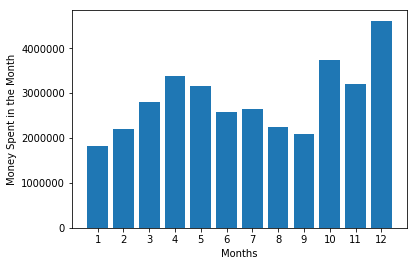

In [53]:
months = range(1,13)
plt.xticks(months)
plt.bar(months,Month_states['Sales'])
plt.xlabel('Months')
plt.ylabel('Money Spent in the Month')
plt.show()

In [49]:
# What city had the highest number of sales
all_data.head()

,Order ID,Product,Price Each,Order Date,Purchase Address,Month,Quantity Ordered,Sales
0,176558,USB-C Charging Cable,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2,23.90
2,176559,Bose SoundSport Headphones,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1,99.99
3,176560,Google Phone,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00
4,176560,Wired Headphones,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99
5,176561,Wired Headphones,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1,11.99


In [70]:
#lets use .apply
def get_city(address):
    return address.split(',')[1]
def get_state(state):
    return state.split(',')[2].split(' ')[1]


all_data['City'] = all_data['Purchase Address'].apply(lambda x : get_city(x)+ ' (' + get_state(x) + ')')
all_data.head()

,Order ID,Product,Price Each,Order Date,Purchase Address,Month,Quantity Ordered,Sales,City
0,176558,USB-C Charging Cable,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1,99.99,Boston (MA)
3,176560,Google Phone,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00,Los Angeles (CA)
4,176560,Wired Headphones,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99,Los Angeles (CA)
5,176561,Wired Headphones,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1,11.99,Los Angeles (CA)


In [72]:
City_stats = all_data.groupby('City').sum()
City_stats

,Price Each,Month,Quantity Ordered,Sales
City,,,,
Atlanta (GA),2.779908e+06,104794,16602,2.795499e+06
Austin (TX),1.809874e+06,69829,11153,1.819582e+06
Boston (MA),3.637410e+06,141112,22528,3.661642e+06
Dallas (TX),2.752628e+06,104620,16730,2.767975e+06
Los Angeles (CA),5.421435e+06,208325,33289,5.452571e+06
New York City (NY),4.635371e+06,175741,27932,4.664317e+06
Portland (ME),4.471893e+05,17144,2750,4.497583e+05
Portland (OR),1.860558e+06,70621,11303,1.870732e+06
San Francisco (CA),8.211462e+06,315520,50239,8.262204e+06


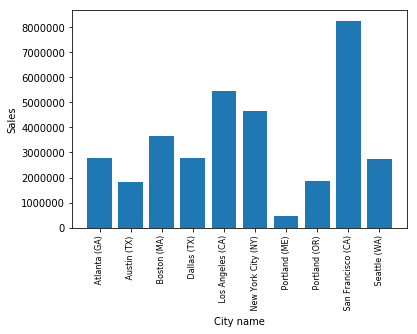

In [84]:
cities = [city for city,df in all_data.groupby('City')]
plt.xticks(rotation='vertical',size =8)
plt.bar(cities,City_stats['Sales'])
plt.xlabel('City name')
plt.ylabel('Sales')
plt.show()

In [85]:
#What time should we display advertisements to maximise likelihood of customer's product
all_data.head()

,Order ID,Product,Price Each,Order Date,Purchase Address,Month,Quantity Ordered,Sales,City
0,176558,USB-C Charging Cable,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1,99.99,Boston (MA)
3,176560,Google Phone,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00,Los Angeles (CA)
4,176560,Wired Headphones,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99,Los Angeles (CA)
5,176561,Wired Headphones,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1,11.99,Los Angeles (CA)


In [86]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Price Each,Order Date,Purchase Address,Month,Quantity Ordered,Sales,City
0,176558,USB-C Charging Cable,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,1,99.99,Boston (MA)
3,176560,Google Phone,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00,Los Angeles (CA)
4,176560,Wired Headphones,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99,Los Angeles (CA)
5,176561,Wired Headphones,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,1,11.99,Los Angeles (CA)


In [87]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Price Each,Order Date,Purchase Address,Month,Quantity Ordered,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,1,99.99,Boston (MA),22,30
3,176560,Google Phone,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,1,11.99,Los Angeles (CA),9,27


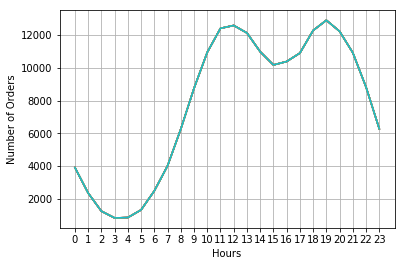

In [98]:
hours = [hour for hour,df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.show()


In [99]:
#What products are most often sold together?
all_data.head()

,Order ID,Product,Price Each,Order Date,Purchase Address,Month,Quantity Ordered,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,1,99.99,Boston (MA),22,30
3,176560,Google Phone,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,1,11.99,Los Angeles (CA),9,27


In [106]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
#df.head(20)
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
#df.head()
df = df[['Order ID','Grouped']].drop_duplicates()
df

C:\Users\Bhavani\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [117]:
from itertools import combinations
from collections  import Counter
count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(10):
    print(key,value)
 

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [124]:
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64
